In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Initialization of fixed parameters

year = (2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022)
numbers = (1706, 1605, 841, 622, 803, 374, 581, 595, 576, 706, 745, 1577,1483)
#a1 = (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

#pop_changing = (151423,156905,162585,168471,174570,180889,187437,194222,201020,208277,215692,223241,230809)

#population= 194222
n_iter = 100000

incidence = []
lower_ci = []
upper_ci = []


#Define alpha and beta values
def getAlphaBeta(mu, sigma):
    alpha=(((1-mu)/sigma**2)-(1/mu))*mu**2
    beta=((1/mu)-1)*alpha

    return alpha, beta

Calculating population

In [3]:
#before 2017
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
year1= year[0:7]
val_17 = 194222 # population in 2017
percentage=1.0362 # population growth rate for each year (2014-2016)
temp2 = val_17
pop_changing=[]

for i in year1:
  temp2 = temp2/percentage
  temp2 = math.ceil(temp2)
  pop_changing.append(temp2)
pop_changing.reverse()

In [4]:
#after 2017
year2=year[8:13]
per=(3.62, 3.61, 3.56, 3.50, 3.39) # population growth rate for each year (2018-2021)
temp = val_17
for i in year2:
  temp = temp + (temp*per[i-2018]/100)
  temp = math.ceil(temp)
  pop_changing.append(temp)
pop_changing.insert(7, val_17) #inserting population for 2017
pop_changing

[151426,
 156907,
 162587,
 168472,
 174570,
 180889,
 187437,
 194222,
 201253,
 208519,
 215943,
 223502,
 231079]

In [5]:
#Calculate adjusted incidence for each year

for x in year:
  # Define the distribution of cases
  true_incidence = numbers[x-2010]/pop_changing[x-2010]
  cases_dist = np.random.binomial(n=pop_changing[x-2010], p=true_incidence, size=n_iter)

  # Define the distributions of the adjustment factors
  #(alpha1,beta1) = getAlphaBeta(a1[x-2010],0.01)
  #a1_dist = np.random.beta(alpha1, beta1, size=n_iter)

  # Calculate the crude incidence rate
  crude_rate_dist = cases_dist / pop_changing[x-2010]

  # Calculate the adjusted incidence rate
  adjusted_rate_dist = crude_rate_dist
  incidence.append(np.mean(adjusted_rate_dist*100000))
  incidence
  # Calculate the uncertainty intervals (e.g. 95% confidence intervals) for the adjusted incidence rate
  lower_ci.append(np.percentile(adjusted_rate_dist*100000,2.5))
  upper_ci.append(np.percentile(adjusted_rate_dist*100000,97.5))


In [6]:
true_incidence = numbers[0]/pop_changing[0]
cases_dist = np.random.binomial(n=pop_changing[0], p=true_incidence, size=10)

In [7]:
incidence

[1126.6184406905024,
 1022.8555768703756,
 517.1913744641331,
 369.15479723633604,
 459.9993011399437,
 206.70517831377254,
 309.9751809941474,
 306.3158499037184,
 286.2677227171769,
 338.6177326766386,
 344.9668523638182,
 705.4743223774284,
 641.8397258080571]

Text(0.5, 1.0, 'Pneumococcal incidence ALL IPD')

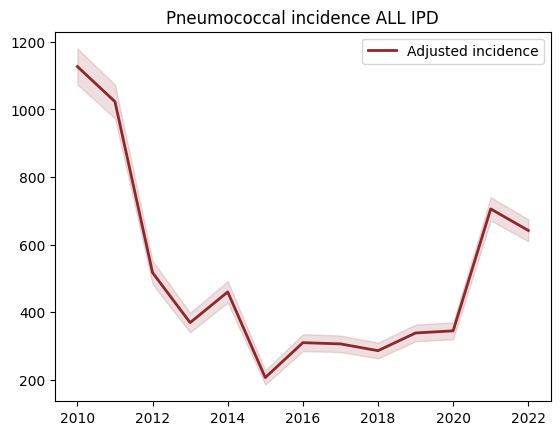

In [8]:
#Plotting the values

plt.plot(year, incidence, '#8F262A', linewidth=2, markersize=12)
#plt.plot(year, lower_ci,'#B298CB', linewidth=2, markersize=12)
#plt.plot(year, upper_ci,'#98CB98', linewidth=2, markersize=12)
plt.fill_between(year, lower_ci, upper_ci, color='#8F262A', alpha=.15)
plt.legend(['Adjusted incidence'])
plt.title("Pneumococcal incidence ALL IPD")

In [9]:
df = pd.DataFrame(
    {'year': year,"incidence":incidence,
     'upper_ci': upper_ci,
     'lower_ci': lower_ci
    })

In [10]:
df

,year,incidence,upper_ci,lower_ci
0,2010,1126.618441,1180.114379,1073.791819
1,2011,1022.855577,1073.247210,973.187939
2,2012,517.191374,552.319681,482.818430
3,2013,369.154797,398.285769,340.709435
4,2014,459.999301,492.066220,428.481411
5,2015,206.705178,227.763988,186.302097
6,2016,309.975181,335.045909,284.895725
7,2017,306.315850,331.064452,282.151353
8,2018,286.267723,310.057490,263.350112
9,2019,338.617733,363.516035,314.120056


Downloading the dataset

In [11]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
te=pd.DataFrame(df)
te.to_excel("Clinical pneumonia incidence calculation with average HCUS data_02January2022.xlsx")